In [5]:
with open("auditd_parsed.out") as f:
    data = f.readlines()
len(data)

72347

In [16]:
from collections import Counter
LIMIT=None
counted_tokens = Counter([item for sublist in data[:LIMIT] for item in sublist.split()])

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plot_counter_most_common(counter, n_most_common=10, ax=None, skip_first=4):
    if ax is None:
        ax = plt.gca()
    counter.most_common(n_most_common)
    x = [x[0] for x in counter.most_common(n_most_common)[skip_first:]]
    y = [x[1] for x in counter.most_common(n_most_common)[skip_first:]]
    sns.barplot(x=y, y=x, ax=ax)
    ax.set_xlabel("Count")
    ax.set_ylabel("Token")
    return ax

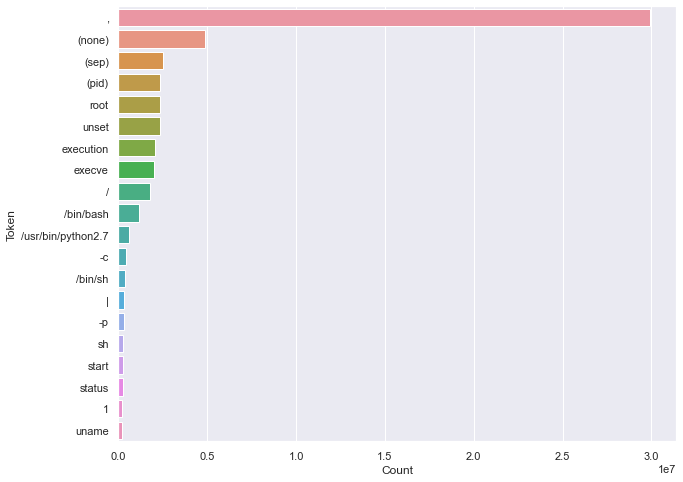

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = plot_counter_most_common(counted_tokens, n_most_common=20, ax=ax, skip_first=0)

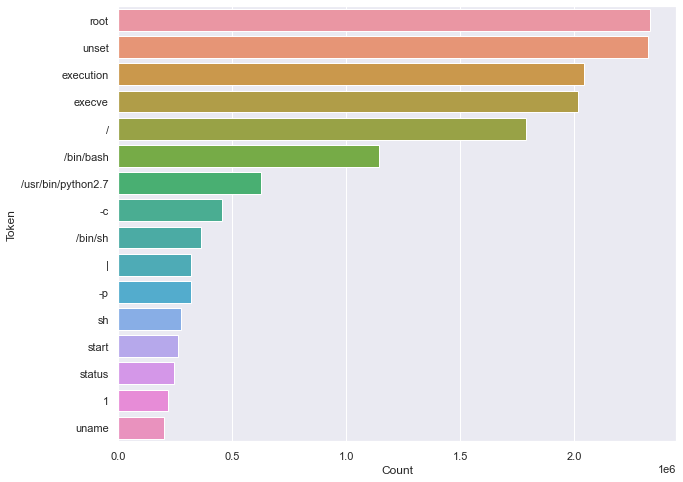

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = plot_counter_most_common(counted_tokens, n_most_common=20, ax=ax, skip_first=4)

<ipython-input-42-56972a9211f4>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks)


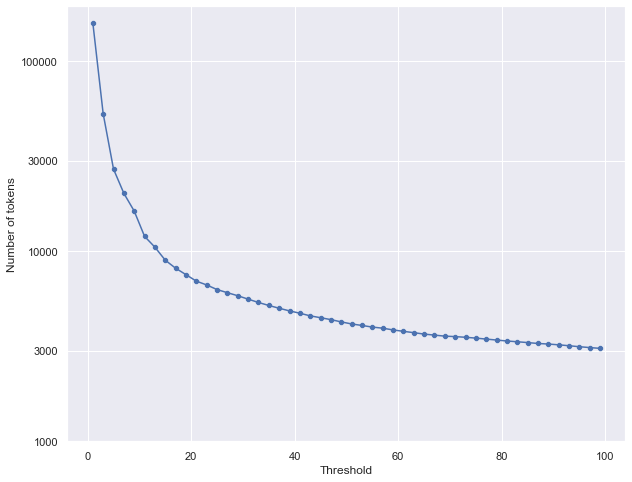

In [42]:
def counter_get_more_than(counter, threshold=10):
    return Counter({k: v for k, v in counter.items() if v > threshold})

def plot_couns_based_on_threshold(counted_tokens, thresholds, ax=None):
    # loop over threshold values and plot as lineplot
    if ax is None:
        ax = plt.gca()
    counts = []
    for threshold in thresholds:
        counts.append(len(counter_get_more_than(counted_tokens, threshold=threshold)))
    sns.lineplot(x=thresholds, y=counts, ax=ax)
    sns.scatterplot(x=thresholds, y=counts, ax=ax)
    ax.set_xlabel("Threshold")
    ax.set_ylabel("Number of tokens")
    return ax

fig, ax = plt.subplots(figsize=(10, 8))
ax = plot_couns_based_on_threshold(counted_tokens, thresholds=range(1, 100, 2), ax=ax)
ax.set_yscale("log")
yticks = [int(x) for x in [1000, 3e3, 10000, 3e4, 100000]]
ax.set_yticklabels(yticks)
_ = ax.set_yticks(yticks)